In [1]:
#%matplotlib notebook
import scipy.io as spio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from operator import itemgetter
from scipy.spatial import ConvexHull
import pandas as pd

In [2]:
CIJ = spio.loadmat('data/Conectoma.mat')['CIJ_fbden_average']
XYZ = spio.loadmat('data/coords_sporns_2mm.mat')['coords_new']
N = len(XYZ)

<IPython.core.display.Javascript object>


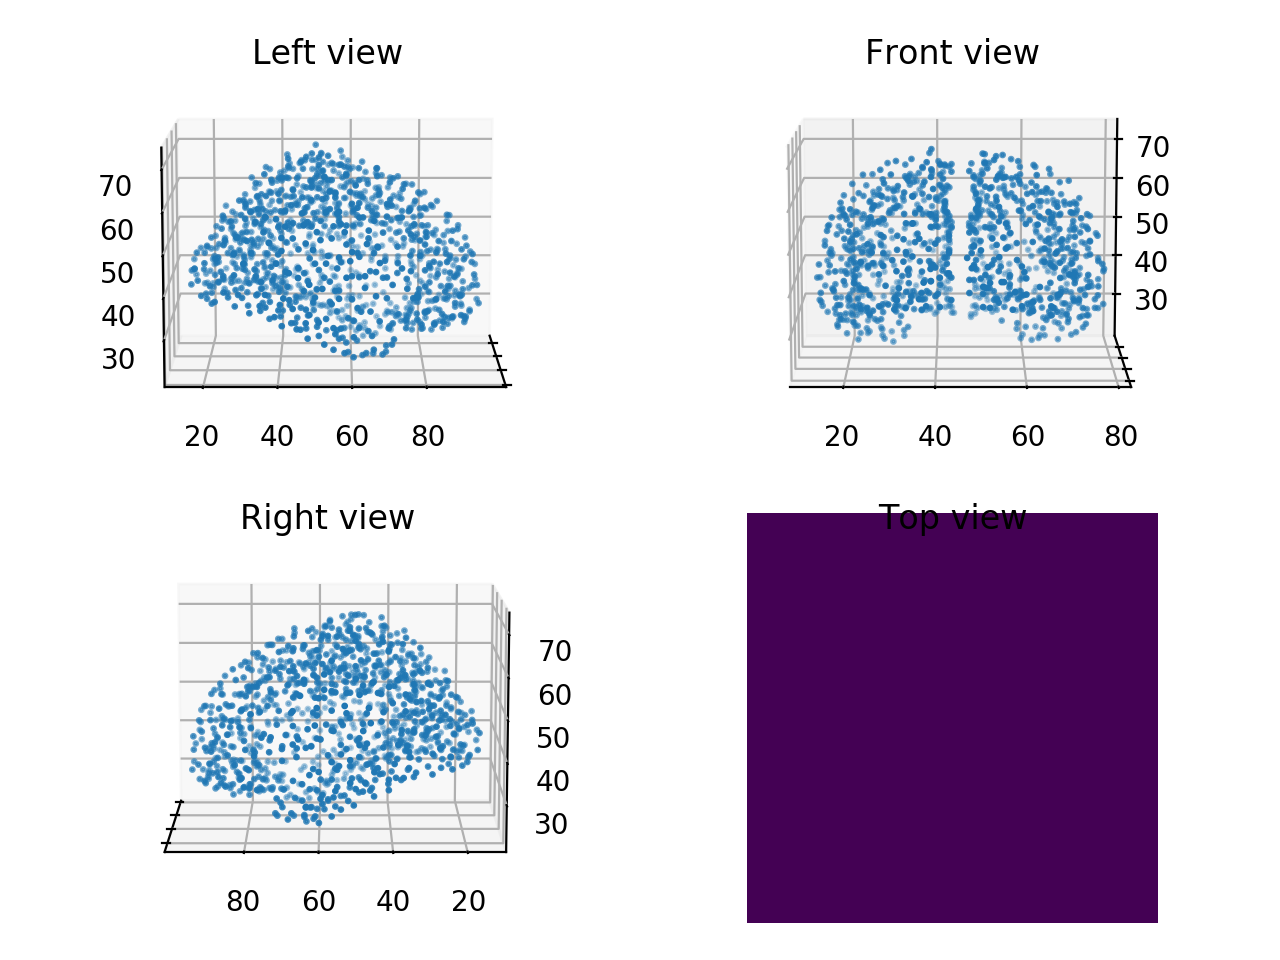

In [94]:
#point = 329
point = 278
point = 90

x0, y0, z0 = XYZ[point]
color_grad = np.zeros(N)
for i, xyz in enumerate(XYZ):
    x, y, z = xyz
    color_grad[i] = np.sqrt((x - x0) ** 2 + (y - y0) ** 2 + (z - z0) ** 2)
    
# Convex Hull
hull = ConvexHull(XYZ)

xs, ys, zs = map(np.array, zip(*XYZ))
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
point_size = 2

mask = np.arange(N) != point
ax.scatter(xs, ys, zs, s=point_size, cmap='viridis')
#ax.scatter(xs[mask], ys[mask], zs[mask], c=color_grad[mask], s=5, cmap='viridis')
#ax.scatter(xs[point], ys[point], zs[point], c='red')
#for simplex in hull.simplices:
#    ax.plot(XYZ[simplex, 0], XYZ[simplex, 1], XYZ[simplex, 2], 'k-', lw=0.1)
ax.set_title('Left view')
ax.view_init(10, 0)

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(xs, ys, zs, s=point_size, cmap='viridis')
ax2.set_title('Front view')
ax2.view_init(10, -90)

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(xs, ys, zs, s=point_size, cmap='viridis')
ax3.set_title('Right view')
ax3.view_init(10, 180)

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(xs, ys, zs, s=point_size, cmap='viridis')
ax4.set_title('Top view')
ax4.view_init(85, -90)

#ax.get_xaxis().set_ticks([])
#ax2.get_xaxis().set_ticks([])
#ax3.get_xaxis().set_ticks([])
#ax4.get_xaxis().set_ticks([])
#ax.get_yaxis().set_ticks([])
#ax2.get_yaxis().set_ticks([])
#ax3.get_yaxis().set_ticks([])
#ax4.get_yaxis().set_ticks([])
#ax.set_zticks([])
#ax2.set_zticks([])
#ax3.set_zticks([])
#ax4.set_zticks([])
ax.set_xticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax4.set_zticklabels([])


plt.tight_layout()
plt.show()
plt.savefig('figures/connectome_3D.png')


In [37]:

ax.view_init(0, 30)
plt.show()

In [ ]:
hull = ConvexHull(XYZ)
hull.vertices

In [40]:
sorted(zip(hull.vertices, color_grad[hull.vertices]), key=itemgetter(1))[:10]

[(90, 0.0),
 (95, 3.6055512754639891),
 (94, 7.5828754440515507),
 (84, 8.1853527718724504),
 (594, 8.4557672626438816),
 (92, 9.6306801421291119),
 (599, 11.346805717910216),
 (102, 12.041594578792296),
 (830, 12.349089035228468),
 (578, 14.150971698084906)]

In [ ]:
sorted(zip(np.arange(N), color_grad), key=itemgetter(1))[:10]

In [ ]:
XYZ

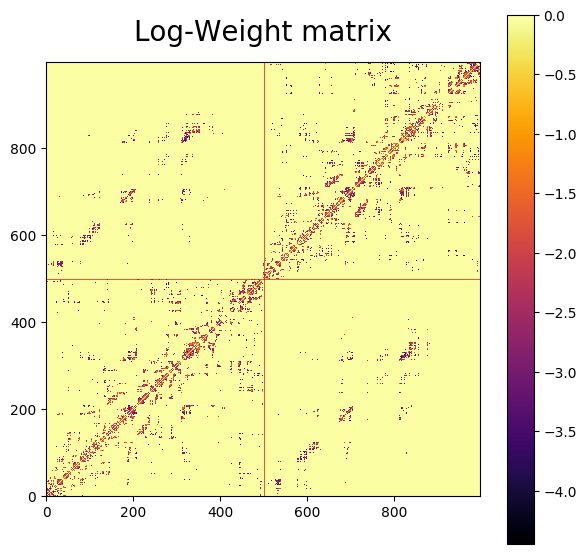

In [138]:
#logCIJ = np.log10(CIJ)
logCIJ = np.ma.log10(CIJ)
logCIJ = logCIJ.filled(0)

fig = plt.figure(figsize=(7, 7), dpi=100)
ax = fig.add_subplot(111)
im = ax.imshow(logCIJ, cmap='inferno')
ax.plot([0, 998], [500, 500], '-r', linewidth=0.5)
ax.plot([500, 500], [0, 998], '-r', linewidth=0.5)
ax.set_xlim([0, 998])
ax.set_ylim([0, 998])
fig.colorbar(im, ax=ax)
ax.set_title('Log-Weight matrix', fontsize=20, fontweight='normal')
ttl = ax.title
ttl.set_position([.5, 1.03])
plt.savefig('figures/connectome_cij.png')
plt.show()

In [19]:
len(CIJ)

998

In [21]:
CIJ

array([[ 0.        ,  0.03307015,  0.08800526, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03307015,  0.        ,  0.04455116, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08800526,  0.04455116,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.06291059,  0.03163873],
       [ 0.        ,  0.        ,  0.        , ...,  0.06291059,
         0.        ,  0.09239733],
       [ 0.        ,  0.        ,  0.        , ...,  0.03163873,
         0.09239733,  0.        ]])